In [41]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Car_list.csv', dtype={'Milleage (kms)': float})
data.head()

,Brand,Model,Fuel type,Transmission,First Registration Year,Milleage (kms),Engine Power (PS),Price (EUR)
0,Mazda,Tribute,Benzin,Schaltgetriebe,06/2001,136000.0,124.0,1490.0
1,Kia,Sorento,Diesel,Schaltgetriebe,01/2003,192000.0,140.0,1900.0
2,Toyota,RAV 4,Benzin,Schaltgetriebe,01/1998,266000.0,128.0,2750.0
3,BMW,X3,Diesel,Schaltgetriebe,06/2005,320000.0,204.0,3999.0
4,Ford,Expedition,Benzin,Automatik,07/2005,275500.0,305.0,4299.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    400 non-null    object 
 1   Model                    400 non-null    object 
 2   Fuel type                400 non-null    object 
 3   Transmission             400 non-null    object 
 4   First Registration Year  400 non-null    object 
 5   Milleage (kms)           400 non-null    float64
 6   Engine Power (PS)        400 non-null    float64
 7   Price (EUR)              400 non-null    float64
dtypes: float64(3), object(5)
memory usage: 25.1+ KB


In [4]:
data.describe()

,Milleage (kms),Engine Power (PS),Price (EUR)
count,400.000000,400.000000,400.000000
mean,78708.432500,131.330000,11268.597500
std,52050.549161,37.848744,2151.021892
min,1.000000,75.000000,1490.000000
25%,46469.750000,110.000000,9990.000000
50%,71999.000000,125.000000,11899.500000
75%,104734.500000,140.000000,12990.000000
max,320000.000000,349.000000,13790.000000


In [5]:
lst = data.index[data['First Registration Year'] == '-/- (Erstzulassung)'].tolist()
years =[]

for el in lst:
    data.at[el, 'First Registration Year'] = '09/2020'

for el in data['First Registration Year']:
    years.append(el.split("/")[1])

In [6]:
for i in range(len(years)):
    data['First Registration Year'][i] = years[i]
    
data.astype({'First Registration Year': int})

C:\Users\LAMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Brand,Model,Fuel type,Transmission,First Registration Year,Milleage (kms),Engine Power (PS),Price (EUR)
0,Mazda,Tribute,Benzin,Schaltgetriebe,2001,136000.0,124.0,1490.0
1,Kia,Sorento,Diesel,Schaltgetriebe,2003,192000.0,140.0,1900.0
2,Toyota,RAV 4,Benzin,Schaltgetriebe,1998,266000.0,128.0,2750.0
3,BMW,X3,Diesel,Schaltgetriebe,2005,320000.0,204.0,3999.0
4,Ford,Expedition,Benzin,Automatik,2005,275500.0,305.0,4299.0
...,...,...,...,...,...,...,...,...
395,Opel,Mokka,Benzin,Schaltgetriebe,2016,46379.0,140.0,13770.0
396,Opel,Mokka,Benzin,Schaltgetriebe,2014,43723.0,140.0,13780.0
397,Renault,Captur,Benzin,Schaltgetriebe,2019,17724.0,90.0,13790.0
398,Renault,Captur,Benzin,Schaltgetriebe,2019,14102.0,90.0,13790.0


In [7]:
data['Fuel type'] = data['Fuel type'].astype('category')
data['Fuel type cod'] = data['Fuel type'].cat.codes
data['Transmission'] = data['Transmission'].astype('category')
data['Transmission cod'] = data['Transmission'].cat.codes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Brand                    400 non-null    object  
 1   Model                    400 non-null    object  
 2   Fuel type                400 non-null    category
 3   Transmission             400 non-null    category
 4   First Registration Year  400 non-null    object  
 5   Milleage (kms)           400 non-null    float64 
 6   Engine Power (PS)        400 non-null    float64 
 7   Price (EUR)              400 non-null    float64 
 8   Fuel type cod            400 non-null    int8    
 9   Transmission cod         400 non-null    int8    
dtypes: category(2), float64(3), int8(2), object(3)
memory usage: 20.7+ KB


In [9]:
data.head(10)

,Brand,Model,Fuel type,Transmission,First Registration Year,Milleage (kms),Engine Power (PS),Price (EUR),Fuel type cod,Transmission cod
0,Mazda,Tribute,Benzin,Schaltgetriebe,2001,136000.0,124.0,1490.0,1,1
1,Kia,Sorento,Diesel,Schaltgetriebe,2003,192000.0,140.0,1900.0,2,1
2,Toyota,RAV 4,Benzin,Schaltgetriebe,1998,266000.0,128.0,2750.0,1,1
3,BMW,X3,Diesel,Schaltgetriebe,2005,320000.0,204.0,3999.0,2,1
4,Ford,Expedition,Benzin,Automatik,2005,275500.0,305.0,4299.0,1,0
5,Opel,Antara,Diesel,Automatik,2007,193163.0,150.0,4490.0,2,0
6,Mitsubishi,Outlander,Benzin,Schaltgetriebe,2006,171809.0,160.0,4500.0,1,1
7,Land Rover,Freelander,Diesel,Automatik,2005,186999.0,109.0,4975.0,2,0
8,BMW,X5,Diesel,Automatik,2002,173000.0,184.0,5680.0,2,0
9,Ford,Kuga,Diesel,Schaltgetriebe,2011,310000.0,140.0,6275.0,2,1


In [10]:
#sns.pairplot(data)

In [11]:
lr = LinearRegression()

In [43]:
X = data[[ 'Transmission cod','Milleage (kms)', 'Engine Power (PS)', 'First Registration Year']]
y = data['Price (EUR)']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [45]:
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

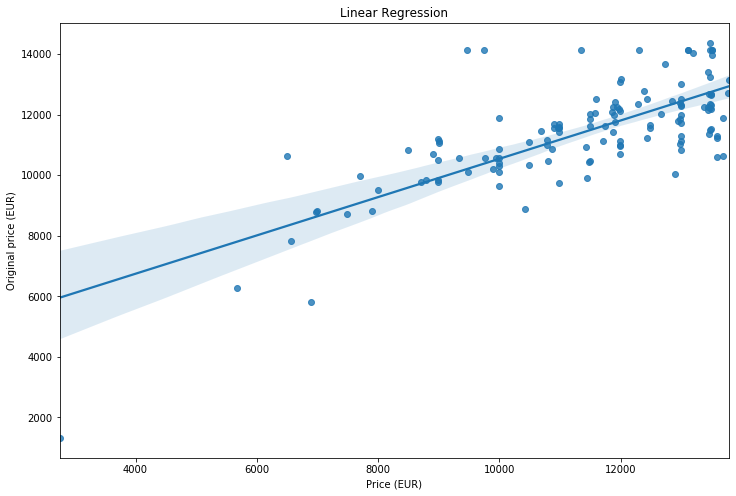

In [46]:
fig = plt.figure(figsize=[12,8])
plt.title("Linear Regression")
plt.xlabel("Predicted price (EUR)")
plt.ylabel("Original price (EUR)")
sns.regplot(y_test, pred_lr)

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('Score:', metrics.r2_score(y_test, pred_lr)*100 )

MAE: 1076.8381492665405
MSE: 1876906.8566554
RMSE: 1370.0025024266927
Score: 55.37797092413654


In [48]:
ls = Lasso(alpha=0.1)

In [49]:
ls.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
pred_ls = ls.predict(X_test)

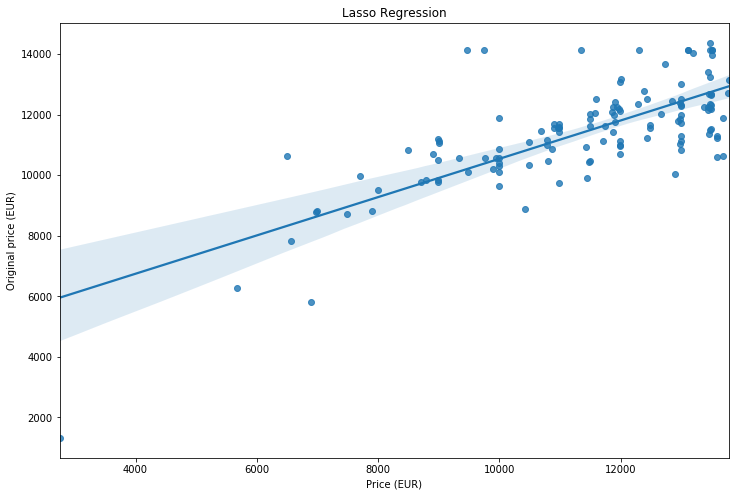

In [51]:
fig = plt.figure(figsize=[12,8])
plt.title("Lasso Regression")
plt.xlabel("Predicted price (EUR)")
plt.ylabel("Original price (EUR)")
sns.regplot(y_test, pred_ls)

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ls)))
print('Score:', metrics.r2_score(y_test, pred_ls)*100 )

MAE: 1076.8620056227594
MSE: 1876988.4082757677
RMSE: 1370.032265414128
Score: 55.376032096558426


In [53]:
rm = RandomForestRegressor()
rm.fit(X_train, y_train)
pred_rm=rm.predict(X_test)

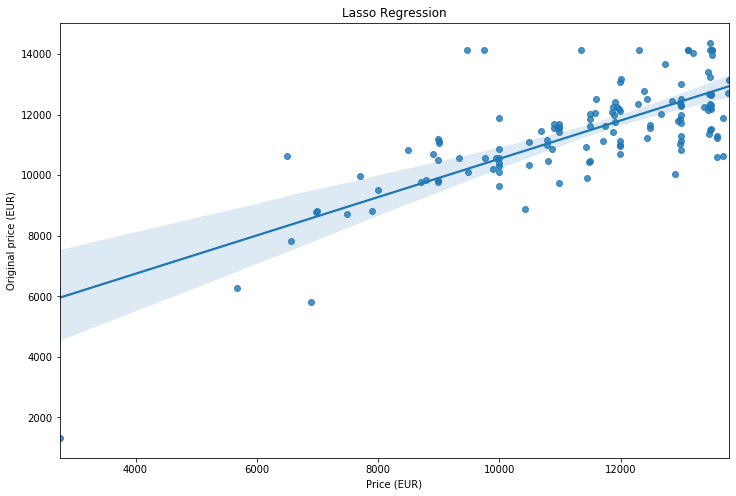

In [54]:
fig = plt.figure(figsize=[12,8])
plt.title("Lasso Regression")
plt.xlabel("Predicted price (EUR)")
plt.ylabel("Original price (EUR)")
sns.regplot(y_test, pred_ls)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rm))
print('MSE:', metrics.mean_squared_error(y_test, pred_rm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rm)))
print('Score:', metrics.r2_score(y_test, pred_rm)*100 )

MAE: 1077.2147170815297
MSE: 1887020.7239480594
RMSE: 1373.6887289149822
Score: 55.137521442692005
